## GPA(Grade Point Average) Rating

<br>

GPA 4.5
<br>GPA 4.3

<br>

### Development Envrionment

In [ ]:
%pip install xlsxwriter

In [1]:
import os
import openpyxl
from openpyxl import Workbook
from openpyxl.drawing.image import Image
import pandas as pd
import numpy as np
import dataframe_image
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm

### GPA 4.3

In [4]:
exam_score_df = pd.read_excel("강의 1 총점.xlsx", engine='openpyxl')
lecture_01_df = pd.read_excel("강의 1 출석부 명단.xlsx", engine='openpyxl')

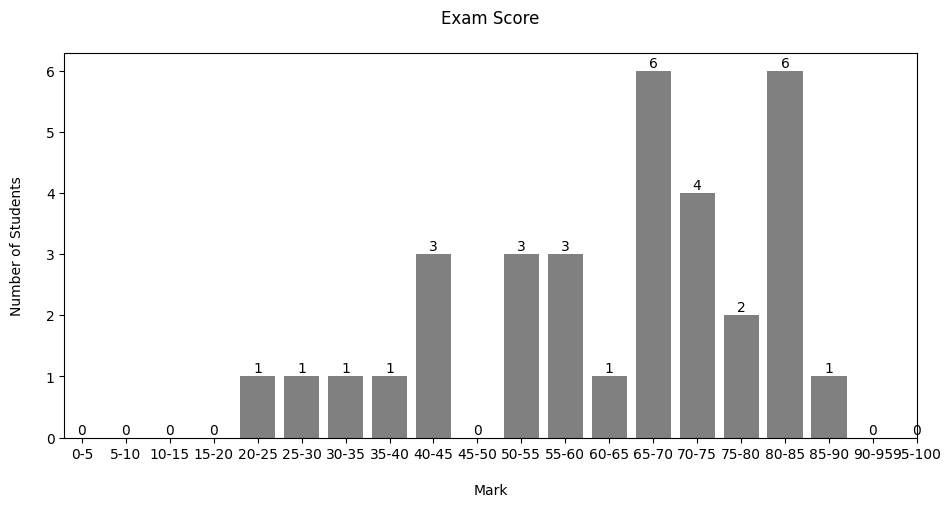

In [5]:
data = exam_score_df['총점']

bins = np.arange(0,105,5)  
hist, bins = np.histogram(data, bins)


plt.figure(figsize=(11, 5))
bins = np.arange(0, 105, 5) 
ax = data.plot.hist(bins=bins, width=4, xlim=(0, 70), legend=False,
                  title='Exam Score\n', color='gray') 
ax.set_xlabel('\nMark')
ax.set_ylabel('Number of Students\n')
ax.set_xticks(np.arange(5, 105, 5)-3)
ax.set_xticklabels(['0-5', '5-10', '10-15', '15-20', '20-25', '25-30', '30-35', '35-40', '40-45', '45-50',
                    '50-55', '55-60', '60-65', '65-70', '70-75', '75-80', '80-85', '85-90',  '90-95', '95-100'])
ax.tick_params(axis='x')

rects = ax.patches

for rect, label in zip(rects, hist):
    height = rect.get_height()
    ax.text(rect.get_x() + rect.get_width() / 2, height+0.01, label,
            ha='center', va='bottom')

plt.savefig('Total Score.png',
            facecolor='#eeeeee', edgecolor='black', format='png', bbox_inches='tight')           
plt.show()

In [6]:
data = exam_score_df['총점']

bins = np.arange(0,105,5)  
hist, bins = np.histogram(data, bins)

reorderlist = ['95-100', '90-95', '85-90', '80-85', '75-80', '70-75',
               '65-70', '60-65', '55-60', '50-55', '45-50', '40-45',
               '35-40', '30-35', '25-30', '20-25', '15-20', '10-15',
               '5-10', '0-5', '응시자', '결원', '총원']


exam_score_number_students = pd.DataFrame({
                                     'Number of Students': {
                                     '95-100': hist[19],
                                     '90-95': hist[18],
                                     '85-90': hist[17],
                                     '80-85': hist[16],
                                     '75-80': hist[15],
                                     '70-75': hist[14],
                                     '65-70': hist[13],                                         
                                     '60-65': hist[12],
                                     '55-60': hist[11],
                                     '50-55': hist[10],
                                     '45-50': hist[9],
                                     '40-45': hist[8],
                                     '35-40': hist[7],
                                     '30-35': hist[6],
                                     '25-30': hist[5],
                                     '20-25': hist[4],
                                     '15-20': hist[3],
                                     '10-15': hist[2],
                                     '5-10': hist[1],
                                     '0-5': hist[0],
                                     '응시자': sum(hist),
                                     '결원': len(lecture_01_df) - sum(hist),
                                     '총원': len(lecture_01_df)
                                     }})


exam_score_number_students = exam_score_number_students.iloc[pd.Categorical(exam_score_number_students.index,reorderlist).argsort()]

dataframe_image.export(exam_score_number_students, 'exam_score_number_of_students.png', max_cols = -1, max_rows = -1)    

#### By Ratio

In [155]:
a_plus_number_of_students = int(0.15 * 46)
a_zero_number_of_students = int(0.30 * 46) 
a_minus_number_of_students = int(0.45 * 46) 
b_plus_number_of_students = int(0.55 * 46)
b_zero_number_of_students = int(0.65 * 46) 
b_minus_number_of_students = int(0.70 * 46)
c_plus_number_of_students = int(0.80 * 46)
c_zero_number_of_students = int(0.85 * 46) 
c_minus_number_of_students = int(0.90 * 46)
d_plus_number_of_students = int(0.95 * 46)

the_name_of_credit = ['A+', 'A0', 'A-', 'B+', 'B0', 'B-', 'C+', 'C0', 'C-', 'D+']
the_number_of_credit = [a_plus_number_of_students,
                             a_minus_number_of_students - a_zero_number_of_students,
                             a_zero_number_of_students - a_plus_number_of_students,
                             b_plus_number_of_students - a_minus_number_of_students,
                             b_zero_number_of_students - b_plus_number_of_students,
                             b_minus_number_of_students - b_zero_number_of_students,
                             c_plus_number_of_students - b_minus_number_of_students,
                             c_zero_number_of_students - c_plus_number_of_students,
                             c_minus_number_of_students - c_zero_number_of_students,
                             d_plus_number_of_students - c_minus_number_of_students]
the_cumulative_number_of_credit = [a_plus_number_of_students,
                             a_zero_number_of_students,
                             a_minus_number_of_students,
                             b_plus_number_of_students,
                             b_zero_number_of_students, 
                             b_minus_number_of_students,
                             c_plus_number_of_students,
                             c_zero_number_of_students, 
                             c_minus_number_of_students,
                             d_plus_number_of_students]

credit_ratio = pd.DataFrame({'Credit': the_name_of_credit,
                             'Number': the_number_of_credit,
                             'Cumulative Number':the_cumulative_number_of_credit})
credit_ratio

,Credit,Number,Cumulative Number
0,A+,6,6
1,A0,7,13
2,A-,7,20
3,B+,5,25
4,B0,4,29
5,B-,3,32
6,C+,4,36
7,C0,3,39
8,C-,2,41
9,D+,2,43


#### By Number

In [7]:
a_plus_number_of_students = 4
a_zero_number_of_students = 4
a_minus_number_of_students = 5
b_plus_number_of_students = 7
b_zero_number_of_students = 6
b_minus_number_of_students = 3
c_plus_number_of_students = 1
c_zero_number_of_students = 1
c_minus_number_of_students = 2


the_name_of_credit = ['A+', 'A0', 'A-', 'B+', 'B0', 'B-', 'C+', 'C0', 'C-']
the_number_of_credit = [a_plus_number_of_students,
                             a_zero_number_of_students,
                             a_minus_number_of_students,
                             b_plus_number_of_students,
                             b_zero_number_of_students, 
                             b_minus_number_of_students,
                             c_plus_number_of_students,
                             c_zero_number_of_students, 
                             c_minus_number_of_students]

the_cumulative_number_of_credit = np.cumsum(the_number_of_credit)

credit_ratio = pd.DataFrame({'Credit': the_name_of_credit,
                             'Number': the_number_of_credit,
                             'Cumulative Number':the_cumulative_number_of_credit})
credit_ratio

,Credit,Number,Cumulative Number
0,A+,4,4
1,A0,4,8
2,A-,5,13
3,B+,7,20
4,B0,6,26
5,B-,3,29
6,C+,1,30
7,C0,1,31
8,C-,2,33


In [8]:
# a_plus_credit = exam_score_df.sort_values(by='석차', ascending=True)[:a_plus_number_of_students]
a_plus_credit = exam_score_df.sort_values(by='석차', ascending=True)[:the_cumulative_number_of_credit[0]]
a_plus_credit['학점'] = 'A+'

# a_zero_credit = exam_score_df.sort_values(by='석차', ascending=True)[a_plus_number_of_students:a_zero_number_of_students]
a_zero_credit = exam_score_df.sort_values(by='석차', ascending=True)[the_cumulative_number_of_credit[0]:the_cumulative_number_of_credit[1]]
a_zero_credit['학점'] = 'A0'

# a_minus_credit = exam_score_df.sort_values(by='석차', ascending=True)[a_zero_number_of_students:a_minus_number_of_students]
a_minus_credit = exam_score_df.sort_values(by='석차', ascending=True)[the_cumulative_number_of_credit[1]:the_cumulative_number_of_credit[2]]
a_minus_credit['학점'] = 'A-'

# b_plus_credit = exam_score_df.sort_values(by='석차', ascending=True)[a_minus_number_of_students:b_plus_number_of_students]
b_plus_credit = exam_score_df.sort_values(by='석차', ascending=True)[the_cumulative_number_of_credit[2]:the_cumulative_number_of_credit[3]]
b_plus_credit['학점'] = 'B+'

# b_zero_credit = exam_score_df.sort_values(by='석차', ascending=True)[b_plus_number_of_students:b_zero_number_of_students]
b_zero_credit = exam_score_df.sort_values(by='석차', ascending=True)[the_cumulative_number_of_credit[3]:the_cumulative_number_of_credit[4]]
b_zero_credit['학점'] = 'B0'

# b_minus_credit = exam_score_df.sort_values(by='석차', ascending=True)[b_zero_number_of_students:b_minus_number_of_students]
b_minus_credit = exam_score_df.sort_values(by='석차', ascending=True)[the_cumulative_number_of_credit[4]:the_cumulative_number_of_credit[5]]
b_minus_credit['학점'] = 'B-'

# c_plus_credit = exam_score_df.sort_values(by='석차', ascending=True)[b_minus_number_of_students:c_plus_number_of_students]
c_plus_credit = exam_score_df.sort_values(by='석차', ascending=True)[the_cumulative_number_of_credit[5]:the_cumulative_number_of_credit[6]]
c_plus_credit['학점'] = 'C+'

# c_zero_credit = exam_score_df.sort_values(by='석차', ascending=True)[c_plus_number_of_students:c_zero_number_of_students]
c_zero_credit = exam_score_df.sort_values(by='석차', ascending=True)[the_cumulative_number_of_credit[6]:the_cumulative_number_of_credit[7]]
c_zero_credit['학점'] = 'C0'

# c_minus_credit = exam_score_df.sort_values(by='석차', ascending=True)[c_zero_number_of_students:c_minus_number_of_students]
c_minus_credit = exam_score_df.sort_values(by='석차', ascending=True)[the_cumulative_number_of_credit[7]:the_cumulative_number_of_credit[8]]
c_minus_credit['학점'] = 'C-'

# d_plus_credit = exam_score_df.sort_values(by='석차', ascending=True)[c_minus_number_of_students:d_plus_number_of_students]
# d_plus_credit = exam_score_df.sort_values(by='석차', ascending=True)[the_cumulative_number_of_credit[8]:the_cumulative_number_of_credit[9]]
# d_plus_credit['학점'] = 'D+'

# a_plus_credit
# # a_zero_credit
# # a_minus_credit
# b_plus_credit
# b_zero_credit
# b_minus_credit
# c_plus_credit
# c_zero_credit
# c_minus_credit
# d_plus_credit

In [ ]:
abcd_credit_list = [a_plus_credit, a_zero_credit, a_minus_credit,
b_plus_credit, b_zero_credit, b_minus_credit,
c_plus_credit, c_zero_credit, c_minus_credit] # , d_plus_credit]

abcd_credit = pd.concat(abcd_credit_list)
abcd_credit.loc[21, '학점'] = 'F'
abcd_credit

In [ ]:
abcd_credit_by_name_order = abcd_credit.sort_index()
abcd_credit_by_name_order

In [13]:
abcd_credit.to_excel("강의 1 학점 (제출용).xlsx", index = False)
abcd_credit_by_name_order.to_excel("강의 1 학점.xlsx", index = False)

In [14]:
exam_gpa_rating_df = pd.read_excel("강의 1 학점 (제출용).xlsx", engine='openpyxl')

In [45]:
exam_a_plus_first = exam_gpa_rating_df[exam_gpa_rating_df['학점'] == 'A+']['총점'].values[0]
exam_a_plus_last = exam_gpa_rating_df[exam_gpa_rating_df['학점'] == 'A+']['총점'].values[-1]
exam_a_zero_last = exam_gpa_rating_df[exam_gpa_rating_df['학점'] == 'A0']['총점'].values[-1]
exam_a_minus_last = exam_gpa_rating_df[exam_gpa_rating_df['학점'] == 'A-']['총점'].values[-1]
exam_b_plus_last = exam_gpa_rating_df[exam_gpa_rating_df['학점'] == 'B+']['총점'].values[-1]
exam_b_zero_last = exam_gpa_rating_df[exam_gpa_rating_df['학점'] == 'B0']['총점'].values[-1]
exam_b_minus_last = exam_gpa_rating_df[exam_gpa_rating_df['학점'] == 'B-']['총점'].values[-1]
exam_c_plus_last = exam_gpa_rating_df[exam_gpa_rating_df['학점'] == 'C+']['총점'].values[-1]
exam_c_zero_last = exam_gpa_rating_df[exam_gpa_rating_df['학점'] == 'C0']['총점'].values[-1]
exam_c_minus_last = exam_gpa_rating_df[exam_gpa_rating_df['학점'] == 'C-']['총점'].values[-1]
# exam_d_plus_last = exam_gpa_rating_df[exam_gpa_rating_df['학점'] == 'D+']['총점'].values[-1]

gpa = [" "]
gpa = np.repeat(gpa, 10)
credit_list = list(exam_gpa_rating_df['학점'].unique()) 
credit_list.append('D+')
credit_list.remove('F')
credit_list.reverse()
credit_value_list = [ exam_a_plus_first - exam_a_plus_last,
exam_a_plus_last - exam_a_zero_last,
exam_a_zero_last - exam_a_minus_last,
exam_a_minus_last - exam_b_plus_last,
exam_b_plus_last - exam_b_zero_last,
exam_b_zero_last - exam_b_minus_last,
exam_b_minus_last - exam_c_plus_last,
exam_c_plus_last - exam_c_zero_last,
exam_c_zero_last - exam_c_minus_last,
exam_c_minus_last]
credit_value_list.reverse()

data = [gpa, credit_list, credit_value_list]
rows = zip(data[0], data[1], data[2])
headers = ['Title', 'Credit', 'Value']

df = pd.DataFrame(list(rows), columns=headers)

pivot_df = df.pivot(index='Title', columns='Credit', values='Value')
pivot_df = pivot_df[credit_list].copy()

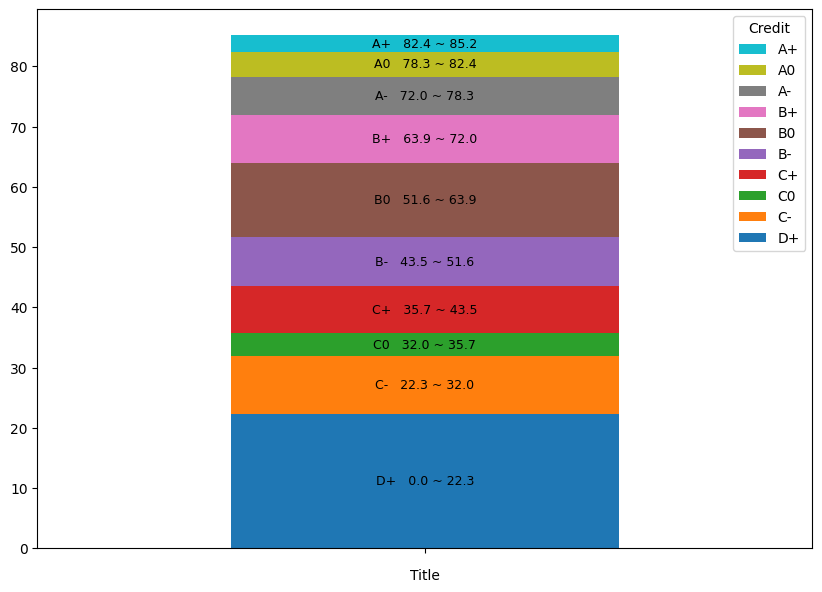

In [46]:
ax = pivot_df.plot(kind="bar", stacked=True, legend='reverse', figsize=(10,7))     
label = 0
for c, d in zip(ax.containers, credit_list):
    labels = [x.get_height() for x in c][0]
    label += labels
    ax.bar_label(c, labels=[d + "   " + str(round(label - labels, 1)) + " ~ " + str(round(label, 1))],
    label_type='center', fontsize=9)
    
plt.savefig('gpa_score_stacked_graph.png')

In [47]:
the_number_of_credit.reverse()
the_number_of_credit.append(0)
label = 0
multiple_list = []
for i , j, k in zip(ax.containers, credit_list, the_number_of_credit):
    labels = [x.get_height() for x in i][0]
    label += labels
    single_list = [j, str(round(label - labels, 1)) + " ~ " + str(round(label, 1)), k]
    multiple_list.append(single_list)

culumnative_df = pd.DataFrame(multiple_list).iloc[::-1].reset_index()
del culumnative_df['index'] 
culumnative_df.columns = ['Credit', 'Score', 'Number']
culumnative_df

,Credit,Score,Number
0,A+,82.4 ~ 85.2,2
1,A0,78.3 ~ 82.4,1
2,A-,72.0 ~ 78.3,1
3,B+,63.9 ~ 72.0,3
4,B0,51.6 ~ 63.9,6
5,B-,43.5 ~ 51.6,7
6,C+,35.7 ~ 43.5,5
7,C0,32.0 ~ 35.7,4
8,C-,22.3 ~ 32.0,4
9,D+,0.0 ~ 22.3,0


### Multiple Dataframe Merge File

In [48]:
blank_df = pd.DataFrame(columns = ['', '', ''], index = ['', '', ''])

In [49]:
dfs = [abcd_credit, blank_df, culumnative_df]

for d in dfs:
    d.to_csv('강의 1 (보관용).csv', mode='a', index=False)

In [51]:
writer = pd.ExcelWriter('강의 1 학점 (보관용).xlsx',engine='xlsxwriter')   
workbook = writer.book
worksheet = workbook.add_worksheet('Validation')
writer.sheets['Validation'] = worksheet
abcd_credit.to_excel(writer, sheet_name='Validation', startrow=0 , startcol=0, index=False)   
culumnative_df.to_excel(writer, sheet_name='Validation',startrow=62, startcol=0, index=False) 
writer.close()

workbook = openpyxl.load_workbook('강의 1 학점 (보관용).xlsx')
worksheet = workbook.active
img = Image('gpa_score_stacked_graph.png') 
worksheet.add_image(img, 'A76')
workbook.save('강의 1 학점 (보관용).xlsx')

In [52]:
dfs = [abcd_credit, blank_df, culumnative_df]

writer = pd.ExcelWriter("강의 1 (보관용).xlsx", engine="xlsxwriter")

dfs[0].to_excel(writer, sheet_name="Sheet1")
dfs[2].to_excel(writer, sheet_name="Sheet2")

writer.close()